### Dataset Preparation

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

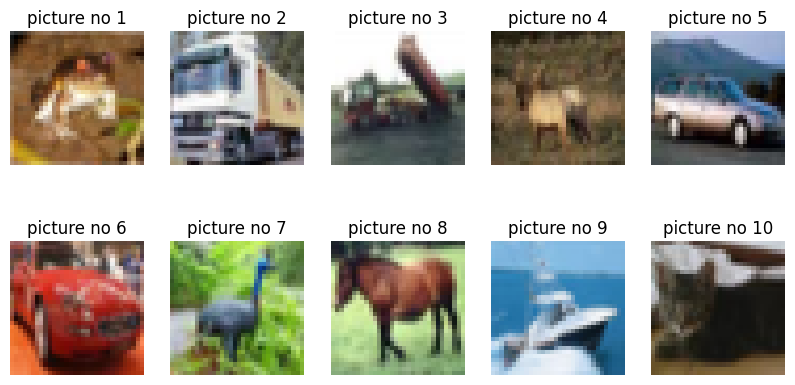

In [ ]:
plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(f"picture no {i+1}")
    plt.axis(False)
    plt.imshow(x_train[i])

plt.show()

## Preprocessing

In [ ]:
x_train = x_train/255
x_test = x_test/255

#Flattened images → for the Neural Network
x_train_flat = x_train.reshape(-1,32*32*3)
x_test_flat = x_test.reshape(-1,32*32*3)

#Reshaped images (32 × 32 × 3) → for the CNN
x_train_reshape=x_train.reshape(x_train.shape[0],32,32,3)
x_test_reshape=x_test.reshape(x_test.shape[0],32,32,3)
#Encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(" Flattened train_data shape :",x_train_flat.shape)
print(" Flattened test_data shape :",x_test_flat.shape)
print(" Reshaped train_data shape :",x_train_reshape.shape)
print(" Reshaped test_data shape :",x_test_reshape.shape)
print(" Encode labels train_data shape :",y_train.shape)
print(" Encode labels test_data shape :",y_test.shape)

 Flattened train_data shape : (50000, 3072)
 Flattened test_data shape : (10000, 3072)
 Reshaped train_data shape : (50000, 32, 32, 3)
 Reshaped test_data shape : (10000, 32, 32, 3)
 Encode labels train_data shape : (50000, 10)
 Encode labels test_data shape : (10000, 10)


### Model Development

## Neural Network (NN)

In [ ]:
def NN_model(input=32*32*3):
  model=models.Sequential([
      layers.Input(shape=(input,)),

      layers.Dense(512,activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.3),
      layers.Dense(128,activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.3),
      layers.Dense(10,activation='softmax')
  ])
  return model

In [ ]:
model1=NN_model()
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model1.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,642,890 (6.27 MB)

 Trainable params: 1,641,610 (6.26 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [ ]:
model_nn=model1.fit(x_train_flat,y_train,epochs=15,validation_data=(x_test_flat, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.2851 - loss: 2.1019 - val_accuracy: 0.3773 - val_loss: 1.7663
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.3687 - loss: 1.7674 - val_accuracy: 0.3945 - val_loss: 1.7244
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3810 - loss: 1.7353 - val_accuracy: 0.4160 - val_loss: 1.6449
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3919 - loss: 1.7055 - val_accuracy: 0.4092 - val_loss: 1.6342
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.4015 - loss: 1.6806 - val_accuracy: 0.3948 - val_loss: 1.6874
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.3991 - loss: 1.6783 - val_accuracy: 0.4251 - val_loss: 1.6007
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4059 - loss: 1.6728 - val_accuracy: 0.4352 - val_loss: 1.5885
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4049 -

In [ ]:
score_NN=model1.evaluate(x_test_flat,y_test,verbose=0)
print("error : %.2f%%" % (100-score_NN[1]*100))
print("accuracy : %.2f%%" % (score_NN[1]*100))



error : 53.96%
accuracy : 46.04%


In [ ]:
model1.save('NN_model.keras')

### Convolutional Neural Network (CNN)

In [ ]:
def CNN_model():
  model=models.Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu',  input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
model2=CNN_model()
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,818 (655.54 KB)

 Trainable params: 167,690 (655.04 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
model_cnn=model2.fit(x_train_reshape,y_train,epochs=15,validation_data=(x_test_reshape, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 46ms/step - accuracy: 0.4214 - loss: 1.6270 - val_accuracy: 0.5713 - val_loss: 1.1998
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.5991 - loss: 1.1421 - val_accuracy: 0.6152 - val_loss: 1.0787
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.6511 - loss: 0.9961 - val_accuracy: 0.5814 - val_loss: 1.2515
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.6771 - loss: 0.9171 - val_accuracy: 0.5247 - val_loss: 1.5210
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7025 - loss: 0.8474 - val_accuracy: 0.6565 - val_loss: 0.9694
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7149 - loss: 0.8121 - val_accuracy: 0.6973 - val_loss: 0.8655
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7294 - loss: 0.7749 - val_accuracy: 0.6311 - val_loss: 1.1460
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.7383 -

In [ ]:
score_cnn=model2.evaluate(x_test_reshape,y_test,verbose=0)
print("error : %.2f%%" % (100-score_cnn[1]*100))
print("accuracy: %.2f%%" % (score_cnn[1]*100))

error : 32.67%
accuracy: 67.33%


In [ ]:

model2.save('CNN_model.keras')

### Evaluation & Results

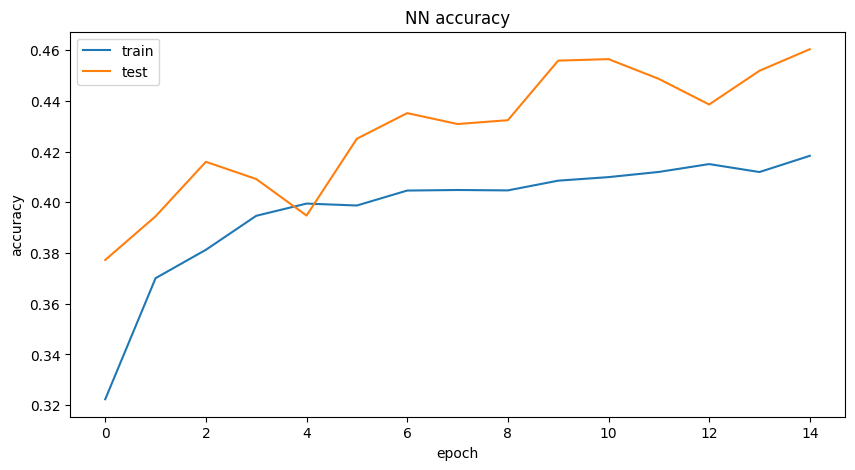

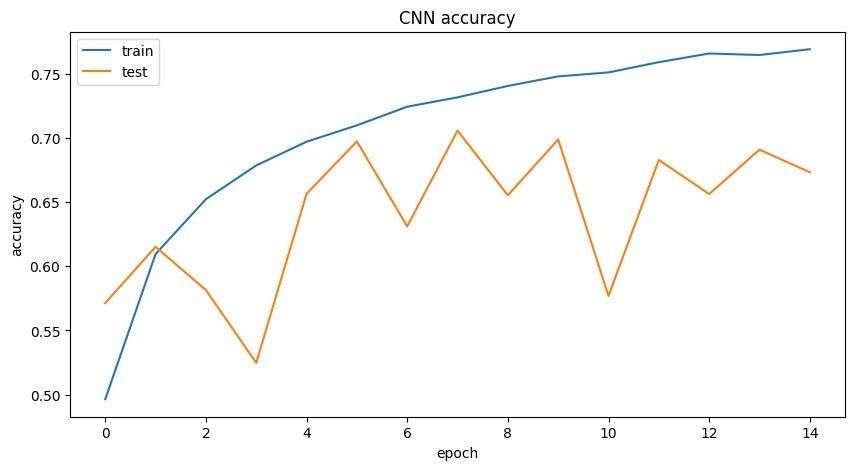

In [ ]:
def  accuracy_plot(history,title):
  plt.figure(figsize=(10,5))
  plt.plot(history.history['accuracy'],label='Train Accuracy')
  plt.plot(history.history['val_accuracy'],label='val_Accuracy')
  plt.title(title)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
accuracy_plot(model_nn,'NN accuracy')
accuracy_plot(model_cnn,'CNN accuracy')



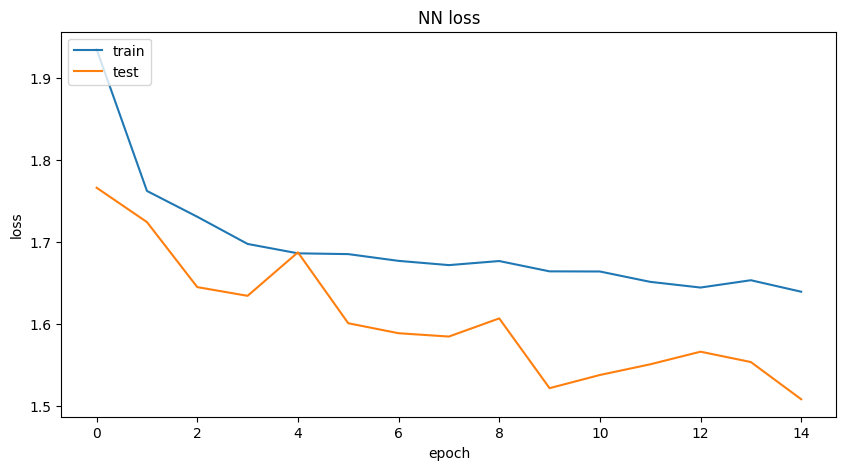

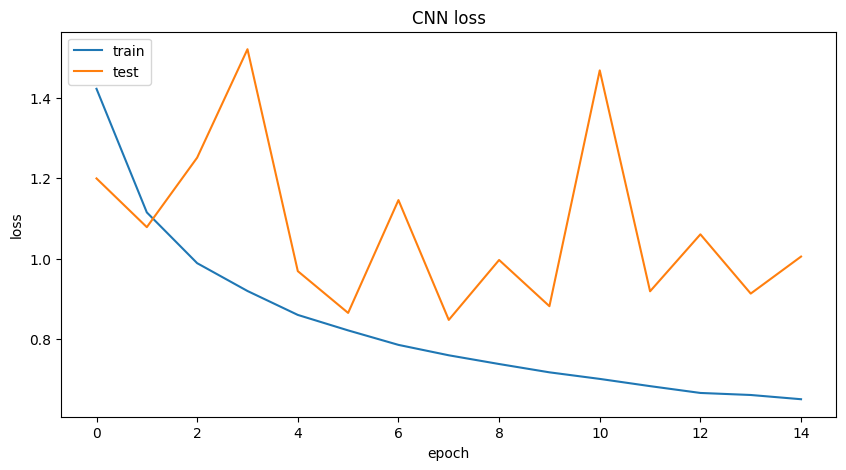

In [ ]:
def loss_plot(history,title):
  plt.figure(figsize=(10,5))
  plt.plot(history.history['loss'],label='Train loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.title(title)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

loss_plot(model_nn,"NN loss")
loss_plot(model_cnn,'CNN loss')

In [ ]:
class_names = [
    'airplane','automobile','bird','cat','deer',
    'dog','frog','horse','ship','truck'
]


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


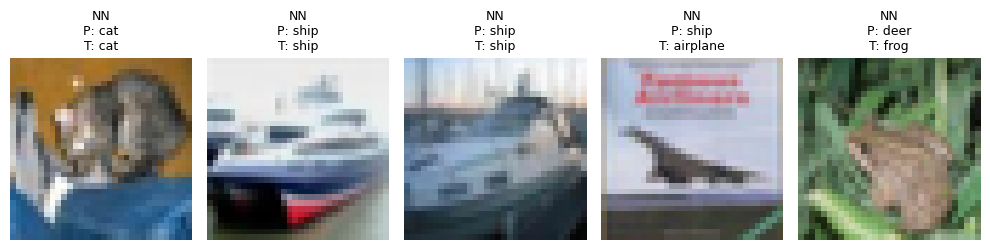

In [ ]:

nn_pred = model1.predict(x_test_flat)

plt.figure(figsize=(10,5))

for i in range(5):
    ax = plt.subplot(1,5,i+1)


    plt.imshow(x_test[i])

    pred_label = class_names[np.argmax(nn_pred[i])]
    true_label = class_names[np.argmax(y_test[i])]

    ax.set_title(f"NN\nP: {pred_label}\nT: {true_label}", fontsize=9)
    ax.axis(False)

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


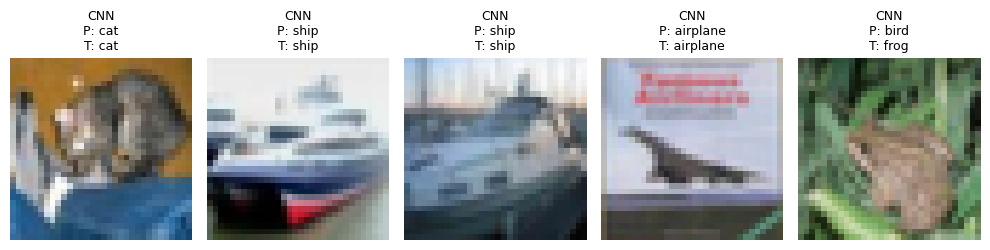

In [ ]:
cnn_pred = model2.predict(x_test_reshape)
plt.figure(figsize=(10,5))

for i in range(5):
    ax = plt.subplot(1,5,i+1)


    plt.imshow(x_test[i])

    pred_label = class_names[np.argmax(cnn_pred[i])]
    true_label = class_names[np.argmax(y_test[i])]

    ax.set_title(f"CNN\nP: {pred_label}\nT: {true_label}", fontsize=9)
    ax.axis(False)

plt.tight_layout()
plt.show()

###Model Comparison & Discussion

In this experiment, two models were trained and evaluated on the CIFAR-10 dataset: a fully connected Neural Network  using flattened image inputs and a Convolutional Neural Network  using reshaped image inputs of size 32×32×3. The NN achieved a test accuracy of 46.04% with an error of 53.96%, while the CNN achieved a significantly higher test accuracy of 67.33% and a lower error of 32.67%. Clearly, the CNN outperformed the NN by approximately 21% in accuracy.

The superior performance of the CNN is attributed to its ability to preserve the spatial structure of images. Convolutional layers in CNNs automatically extract hierarchical features such as edges, textures, and shapes, while pooling layers reduce dimensionality and overfitting by focusing on the most important features. In contrast, the NN treats each image as a flat vector of 3072 pixels, destroying the spatial information and making it difficult for the network to learn meaningful patterns. This loss of structural information explains why the NN performs poorly on complex colored images like those in CIFAR-10, even though flattening works well for simpler datasets like MNIST.

In conclusion, CNNs are inherently better suited for image classification tasks because they can learn and exploit spatial relationships in the data, resulting in higher accuracy and better generalization compared to a standard fully connected Neural Network.